## Ejercicio hiperparametrización breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Prueba al menos 5 modelos diferentes de clasificación y aplica un GridSearchCV mediante Pipelines. Aplica también un RandomizedSearchCV.
3. Conclusiones. Guarda el modelo final en un archivo con pickle.

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pickle 

In [56]:
datos = load_breast_cancer()
datos

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [57]:
df= pd.DataFrame(datos["data"],columns = datos["feature_names"])
df["target"]= datos["target"]
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

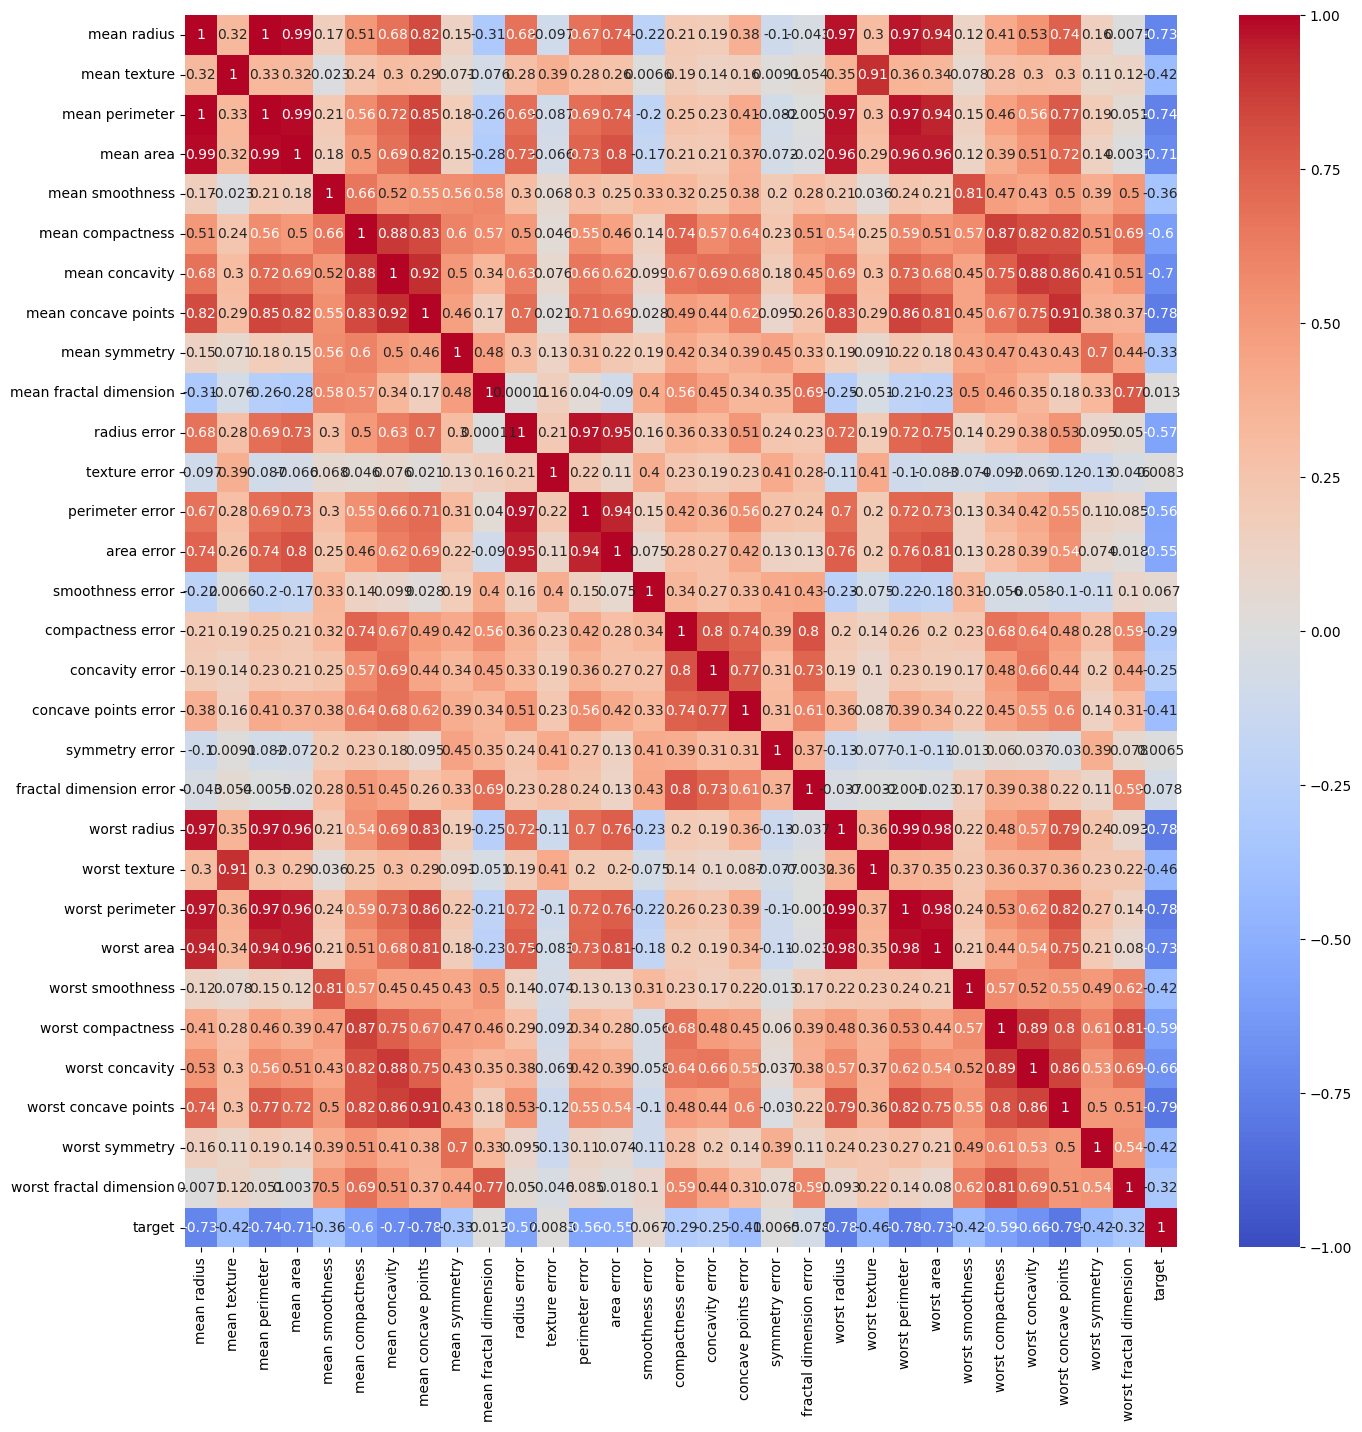

In [58]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,cmap="coolwarm")

In [59]:
#df = df[["mean perimeter","mean concave points","worst radius","worst concave points","target"]]

In [60]:
#sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,cmap="coolwarm")

In [61]:
X = df.drop(columns=["target"])
y= df["target"]


In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=42,random_state=42)

In [63]:
pipe = Pipeline(steps=[("scaler",StandardScaler()),("classifier",RandomForestClassifier())])
RF_parametros = {
    "classifier":[RandomForestClassifier()],
    "classifier__max_depth":np.arange(3,10),
    "classifier__min_samples_split":[10,20,30],
    "classifier__n_estimators":[100,200]
}

DT_parametros = {
    "classifier":[DecisionTreeClassifier()],
    "classifier__max_depth" : np.arange(3,10),
    "classifier__min_samples_split":[10,20,30],
}

BG_parametros = {
    "classifier":[BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5))],
    "classifier__bootstrap":[True,False],
    "classifier__n_estimators":[100,200]
}
AB_parametros = {
    "scaler": [StandardScaler(), MinMaxScaler(), 'passthrough'],
    "classifier": [AdaBoostClassifier()],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.5,0.6,0.9, 1.0,1.1,5]
}
GB_parametros = {
    "scaler": [StandardScaler(), MinMaxScaler(), 'passthrough'],
    "classifier": [GradientBoostingClassifier()],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.5, 1.0,5]
}

busqueda = [RF_parametros,DT_parametros,BG_parametros,AB_parametros,GB_parametros]

modelos = GridSearchCV(estimator=pipe,param_grid=busqueda,cv=5,verbose=2,n_jobs=-1)

modelos.fit(X_train,y_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                          'classifier__min_samples_split': [10, 20, 30],
                          'classifier__n_estimators': [100, 200]},
                         {'classifier': [DecisionTreeClassifier()],
                          'cla...
                         {'classifier': [AdaBoostClassifier()],
                          'classifier__learning_rate': [0.5, 0.6, 0.9, 1.0, 1.1,
                                                        5],
                          'classifier__n_estimators': [100, 200],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     'passthrough']},
                         {'classifier': [GradientBoostingClassifier()],
                          'classifier__learning_rate': [0.5, 1.0, 5],
                          'classifier__n_estimators': [100, 200],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     'passthrough']}],
             verbose=2)

In [64]:
print(modelos.best_score_)
print(modelos.best_params_)
print(modelos.best_estimator_)

0.9771787960467206
{'classifier': AdaBoostClassifier(), 'classifier__learning_rate': 1.1, 'classifier__n_estimators': 200, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=1.1, n_estimators=200))])


In [65]:
ADA_hy = modelos.best_estimator_
ADA_hy.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=1.1, n_estimators=200))])

In [66]:
y_pred = ADA_hy.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9523809523809523
0.9629629629629629
0.9629629629629629
0.9629629629629629


In [67]:
scores = cross_val_score(estimator=ADA_hy,X=X,y=y,cv=10)

In [68]:
print(scores)
print(scores.mean())
print(scores.std())

[0.98245614 0.98245614 0.98245614 0.98245614 0.98245614 0.98245614
 0.96491228 0.94736842 1.         0.96428571]
0.9771303258145363
0.013759518330825653


In [70]:
filename = "pipeline_ej.pkl"
with open(filename,"wb")as archivo:
    pickle.dump(ADA_hy,archivo)

In [72]:
pipe = Pipeline(steps=[("scaler",StandardScaler()),("classifier",RandomForestClassifier())])
RF_parametros = {
    "classifier":[RandomForestClassifier()],
    "classifier__max_depth":np.arange(3,10),
    "classifier__min_samples_split":[10,20,30],
    "classifier__n_estimators":[100,200]
}

DT_parametros = {
    "classifier":[DecisionTreeClassifier()],
    "classifier__max_depth" : np.arange(3,10),
    "classifier__min_samples_split":[10,20,30],
}

BG_parametros = {
    "classifier":[BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5))],
    "classifier__bootstrap":[True,False],
    "classifier__n_estimators":[100,200]
}
AB_parametros = {
    "scaler": [StandardScaler(), MinMaxScaler(), 'passthrough'],
    "classifier": [AdaBoostClassifier()],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.5,0.6,0.9, 1.0,1.1,5]
}
GB_parametros = {
    "scaler": [StandardScaler(), MinMaxScaler(), 'passthrough'],
    "classifier": [GradientBoostingClassifier()],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.5, 1.0,5]
}

busqueda = [RF_parametros,DT_parametros,BG_parametros,AB_parametros,GB_parametros]

modelos2 = RandomizedSearchCV(estimator=pipe, n_iter = 60,param_distributions=busqueda,cv=5,verbose=2,n_jobs=-1)

modelos2.fit(X_train,y_train)
print(modelos2.best_score_)
print(modelos2.best_params_)
print(modelos2.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.9771787960467206
{'scaler': MinMaxScaler(), 'classifier__n_estimators': 200, 'classifier__learning_rate': 1.1, 'classifier': AdaBoostClassifier()}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=1.1, n_estimators=200))])


In [73]:
ADArdm_Hyp = modelos2.best_estimator_
ADArdm_Hyp.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=1.1, n_estimators=200))])

In [74]:
y_pred2 = ADArdm_Hyp.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.9523809523809523
0.9629629629629629
0.9629629629629629
0.9629629629629629


In [75]:
scores2 = cross_val_score(estimator=ADArdm_Hyp,X=X,y=y,cv=10)
print(scores2)
print(scores2.mean())
print(scores2.std())

[0.98245614 0.98245614 0.98245614 0.98245614 0.98245614 0.98245614
 0.96491228 0.94736842 1.         0.96428571]
0.9771303258145363
0.013759518330825653


Mejores resultados con RandomizedSearch

In [78]:
filename2 = "pipelineRDM_ej.pkl"
with open(filename2,"wb")as archivo:
    pickle.dump(ADArdm_Hyp,archivo)